First we import the libraries that are needed for processing the data. We import numpy, pandas for the processing and matplotlib and seaborn for graphical representation. We have also imported the scikit learn library to perform any prediction or feature engineering tasks.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
%matplotlib inline

c:\Users\shour\anaconda3\envs\shourya\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\shour\anaconda3\envs\shourya\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\shour\anaconda3\envs\shourya\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Now we load the data into a pandas dataframe. We are importing employee data of an organisation to gain insights about the reasons of attrition by the employees to help improve the culture and employee retention of the company.

In [3]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

Let's have a look at the data.

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Now let's see what all columns are available in the dataframe and the type of data  they contain.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Firstly let's see if there is a need to clean the data due to mistakes in collecting data.

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Let's change the values of column Attrition from "YES" and "NO" to True and False which will help in our analysis in the future.

In [7]:
category_mapping = {"Yes" : True, "No" : False}

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


We also remove some of the columns due to lack of domain knowledge and understanding of the data those columns represent or because of lack of significant variance in that column.

In [9]:
df.drop(['DailyRate', 'HourlyRate', 'MonthlyRate', 'Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1, inplace=True)

Now we lets see the dataframe and  data types of all our columns again for better understanding. we also remove the limit on the maximum number of rows and columns that can be displayed.

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [11]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2


From this we find the data type of our columns is as follows : <br><br>
Numerical : Age, DistanceFromHome, MonthlyIncome, PercentSalaryHike, TotalWorkingYears, <br>
            YearsAtCompany, YearsInCurrentRole <br><br>
Categorical : Attrition, BusinessTravel, Department, Education, EducationField, EnvironmentSatisfaction, Gender, JobInvolvement, JobLevel,<br>
                JobRole, JobSatisfaction, MaritalStatus, NumCompaniesWorked, Overtime, StockOptionLevel, PerformanceRating <br>
                 RelationshipSatisfaction, WorkLifeBalance<br><br>
Mixed : TrainingTimesLastYear, YearsSinceLastPromotion,YearsWithCurrManager

In [63]:
df[['YearsInCurrentRole', 'YearsSinceLastPromotion']]

,YearsInCurrentRole,YearsSinceLastPromotion
0,4,0
1,7,1
2,0,0
3,7,3
4,2,2
...,...,...
1465,2,0
1466,7,1
1467,2,0
1468,6,0


# Univariate Analysis

We start our univariate analysis by working with the numerical columns of our dataset. We will first start by using the descibe function the numerical columns and plotting boxplots of the columns. For this we will make a separate dataframe for the numerical columns.

In [12]:
numerical_df = df[['Age', 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole']]

In [13]:
numerical_df.describe()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,6502.931293,15.209524,11.279592,7.008163,4.229252
std,9.135373,8.106864,4707.956783,3.659938,7.780782,6.126525,3.623137
min,18.000000,1.000000,1009.000000,11.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2911.000000,12.000000,6.000000,3.000000,2.000000
50%,36.000000,7.000000,4919.000000,14.000000,10.000000,5.000000,3.000000
75%,43.000000,14.000000,8379.000000,18.000000,15.000000,9.000000,7.000000
max,60.000000,29.000000,19999.000000,25.000000,40.000000,40.000000,18.000000


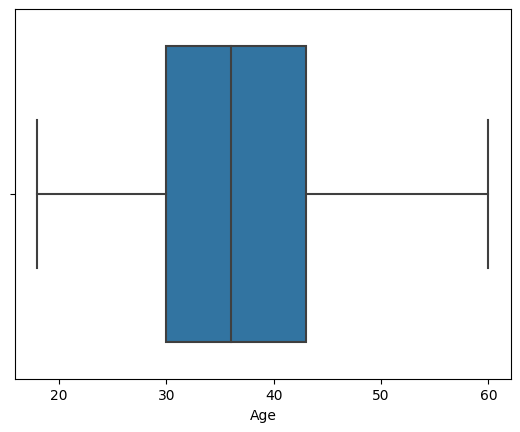

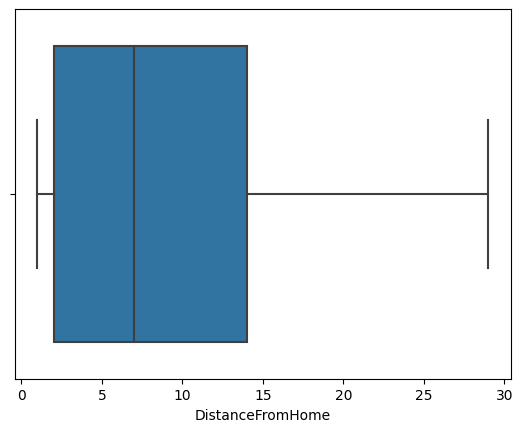

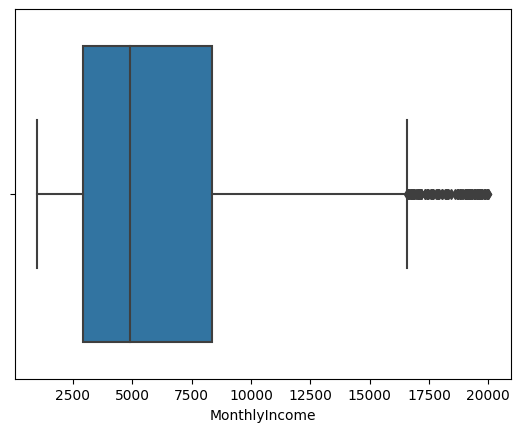

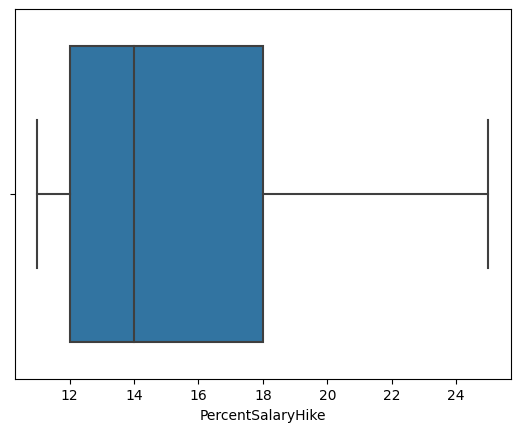

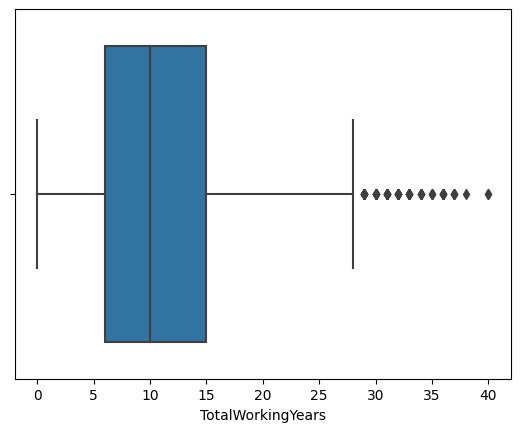

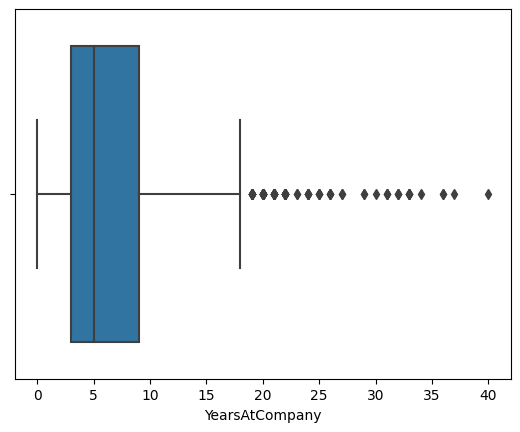

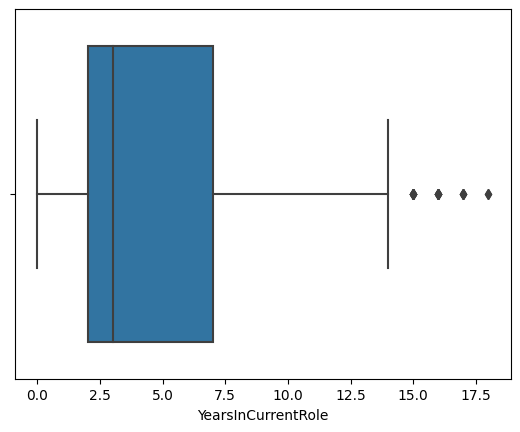

In [14]:
for col in numerical_df.columns:
    plt.figure()
    sns.boxplot(x=numerical_df[col])

From the above boxplots we find that in almost all columns except age, data is skewed towards the left. Let's make kdeplots and calculate the skewness to find out more.

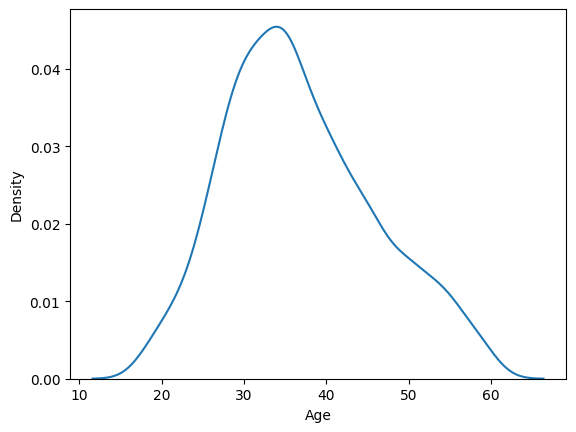

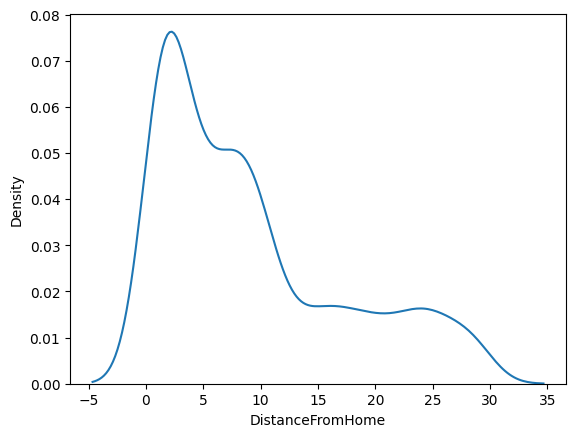

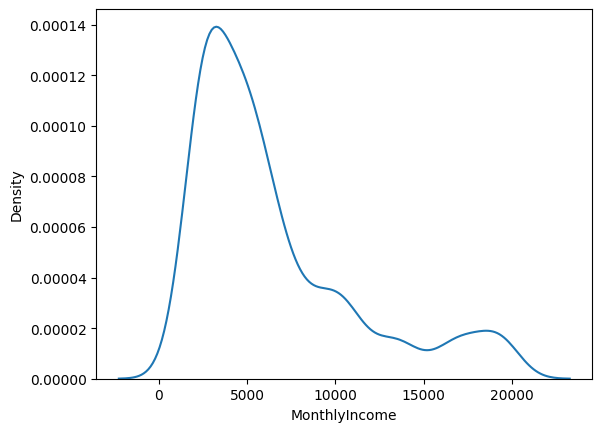

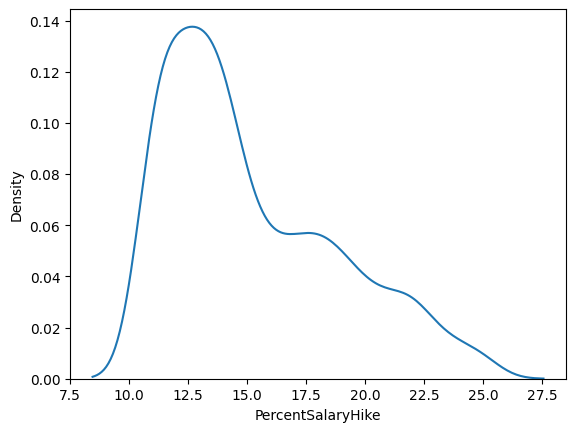

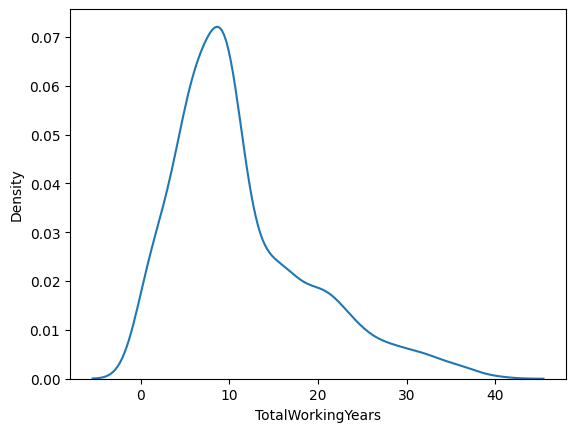

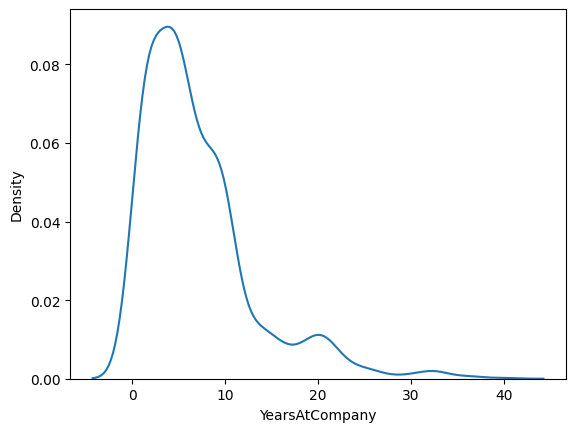

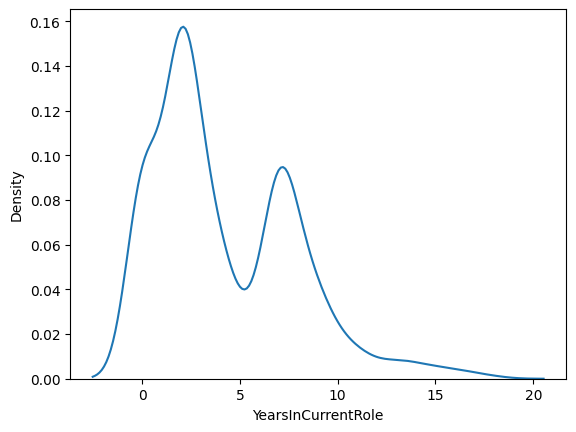

In [15]:
for col in numerical_df.columns:
    plt.figure()
    sns.kdeplot(x=numerical_df[col])

Most of the columns are normally distributed with only problem being with skewness and kurtosis. It is also interesting to note that the data in TotalWorkingYears and YearsAtCompany are skewed towards the left which means that the workforce of the company is composed of a lot of people who are just getting started with their career. This is good as the workforce is young.

In [16]:
for col in numerical_df.columns:
    print(df[col].skew())

0.4132863018563338
0.9581179956568269
1.3698166808390662
0.8211279755780908
1.1171718528128527
1.7645294543422085
0.9173631562908262


From the above graphs and calculations, we confirm that the data is positively skewed.

In [77]:
pd.crosstab(df['Attrition'], df['Gender'], normalize='columns')*100

Gender,Female,Male
Attrition,,
No,85.204082,82.993197
Yes,14.795918,17.006803


We note that Male employees are more likely to to leave the company as compared to female employees. Let's try to find the specific reasons for it by plotting Gender and Age with other columns and performing Multi-Variate Analysis.

In [17]:
temp_df = df[['Age', 'Gender', 'Attrition']]
temp_df.head()

,Age,Gender,Attrition
0,41,Female,Yes
1,49,Male,No
2,37,Male,Yes
3,33,Female,No
4,27,Male,No


<Axes: xlabel='Age', ylabel='Attrition'>

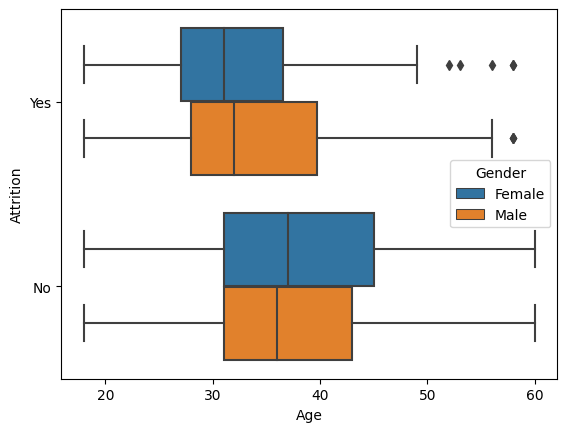

In [18]:
sns.boxplot(data=temp_df, x="Age", y="Attrition", hue='Gender')

From the above graph we denote that most people, both male and female leave mostly at an early age, with the mean value of leaving female employees being less than the mean age of leaving male employees. The reverse is true for employees that stay with mean age of female employees being more than the mean age of male employees.

Splitting into data of male and female employees

In [26]:
condition = df['Gender'] == 'Male'

In [27]:
male_age_based_df = temp_df[condition]
female_age_based_df = temp_df[~condition]

<Axes: xlabel='Age', ylabel='Count'>

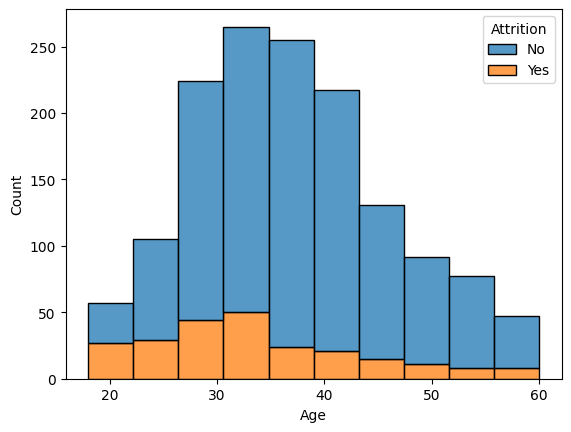

In [28]:
sns.histplot(data=temp_df, x="Age", hue="Attrition", multiple="stack", bins = 10, hue_order=['No', 'Yes'])

<Axes: xlabel='Age', ylabel='Count'>

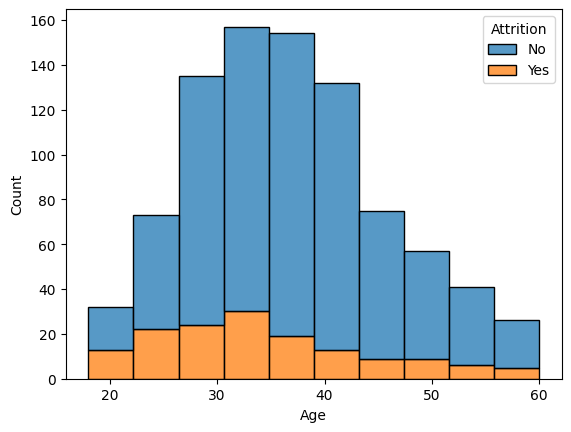

In [29]:
sns.histplot(data=male_age_based_df, x="Age", hue="Attrition", multiple="stack", bins = 10, hue_order=['No', 'Yes'])

<Axes: xlabel='Age', ylabel='Count'>

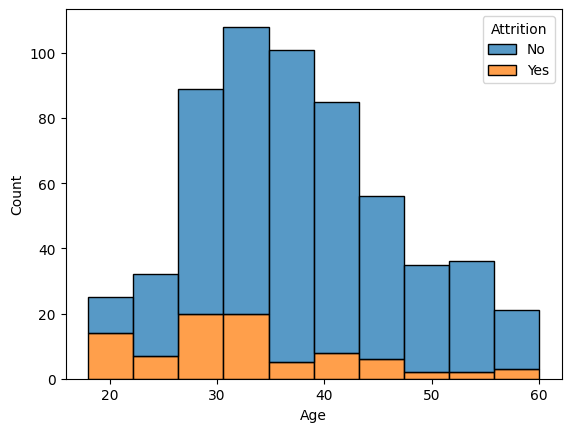

In [30]:
sns.histplot(data=female_age_based_df, x="Age", hue="Attrition", multiple="stack", bins = 10, hue_order=['No', 'Yes'])

<Axes: xlabel='Age', ylabel='Density'>

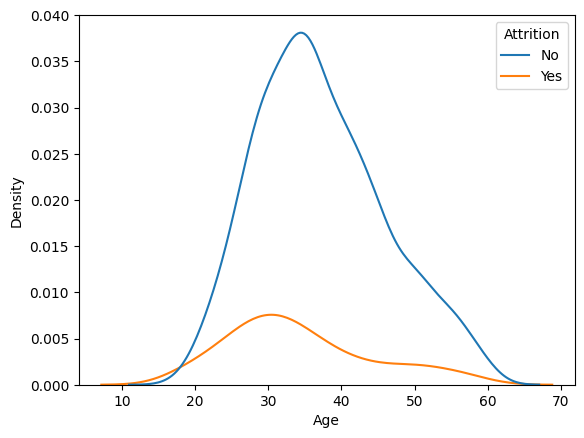

In [31]:
sns.kdeplot(data=temp_df[temp_df['Gender'] == 'Male'], x = 'Age', hue='Attrition')

<Axes: xlabel='Age', ylabel='Density'>

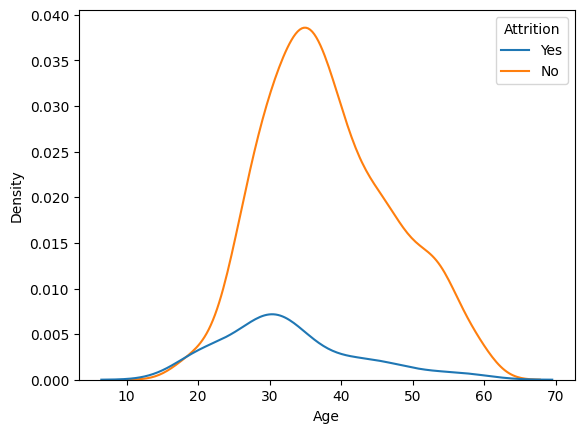

In [32]:
sns.kdeplot(data=temp_df[temp_df['Gender'] == 'Female'], x = 'Age', hue='Attrition')

From all the above graphs, we find out that the rates of attrition among employees increase at first, peaking aroung 35 and then decreases and becomes almost zero towards the older ages. The tail of female employees seem lower than those of male employees. This means that as age increases, males are much more likely to leave as compared to females.

In [40]:
temp_df[condition]['Age'].describe()

count    882.000000
mean      36.653061
std        9.042329
min       18.000000
25%       30.000000
50%       35.000000
75%       42.000000
max       60.000000
Name: Age, dtype: float64

In [41]:
temp_df[~condition]['Age'].describe()

count    588.000000
mean      37.329932
std        9.266083
min       18.000000
25%       31.000000
50%       36.000000
75%       44.000000
max       60.000000
Name: Age, dtype: float64

The mean and ages of different IQR for both male and female are almost the same, the difference starts to increase as we go towards higher percentiles meaning that most of the male employees age are closer to the mean age as compared to female employees. This means that the male employees at the company are relatively younger than the female employees.

In [42]:
temp_df = df[['DistanceFromHome', 'Attrition', 'Gender']]

<Axes: xlabel='DistanceFromHome', ylabel='Attrition'>

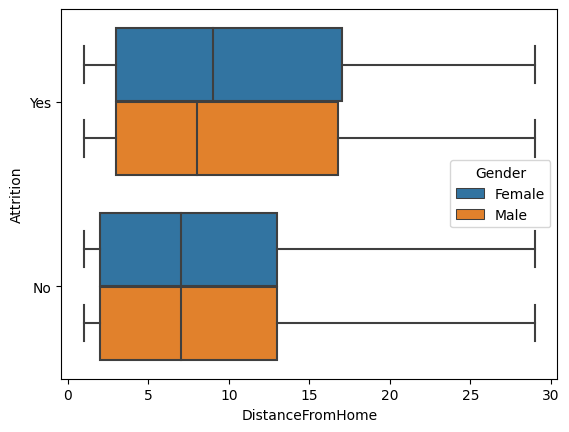

In [43]:
sns.boxplot(data=temp_df, x="DistanceFromHome", y="Attrition", hue='Gender')

It is interesting to note that for staying employees, the average distance from home is same for both male and female employees. We also note that the distance from home is more for leaving employees than for staying one. This can mean that distance from home is an important cause of people quitting the jobs. 

In [47]:
male_distance = temp_df[condition]
female_distance = temp_df[~condition]

<Axes: xlabel='DistanceFromHome', ylabel='Density'>

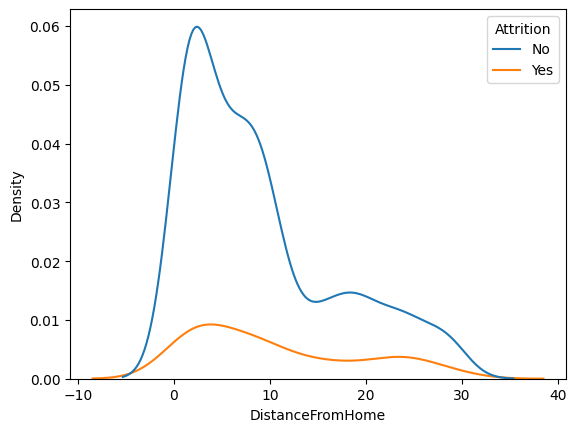

In [50]:
sns.kdeplot(data=temp_df[temp_df['Gender'] == 'Male'], x = 'DistanceFromHome', hue='Attrition')

<Axes: xlabel='DistanceFromHome', ylabel='Density'>

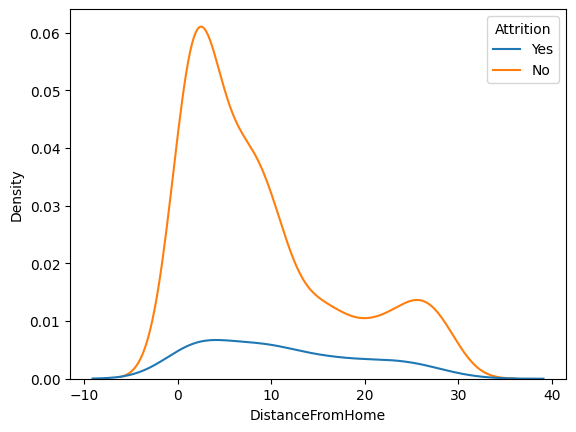

In [51]:
sns.kdeplot(data=temp_df[temp_df['Gender'] == 'Female'], x = 'DistanceFromHome', hue='Attrition')

From the above two graphs we denote that when the distance of office is close to home, the probability of staying is much more than that off leaving but as distance increases, the two probabilities get closer.

Now we will do similar analysis based on the montly income of the employees.

In [53]:
temp_df = df[['MonthlyIncome', 'Attrition', 'Gender']]

<Axes: xlabel='MonthlyIncome', ylabel='Attrition'>

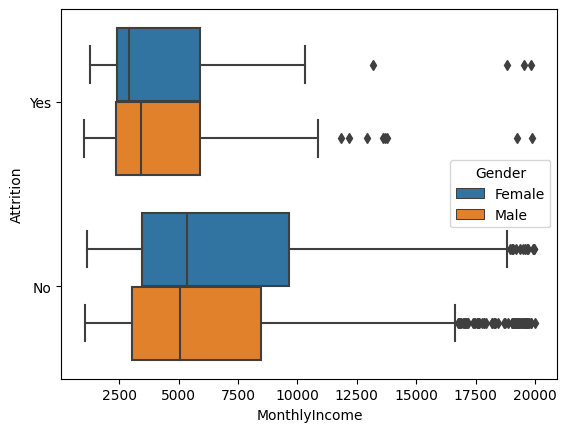

In [54]:
sns.boxplot(data=temp_df, x="MonthlyIncome", y="Attrition", hue='Gender')

From the above graph we note that the leaving employees were in general getting less income as compared to those who stayed. Hence salary is an important factor in deciding if the employee will leave or stay.

In [55]:
male_salary = temp_df[condition]
male_salary.describe()

,MonthlyIncome
count,882.000000
mean,6380.507937
std,4714.856577
min,1009.000000
25%,2819.500000
50%,4837.500000
75%,8113.750000
max,19999.000000


In [57]:
female_salary = temp_df[~condition]
female_salary.describe()

,MonthlyIncome
count,588.000000
mean,6686.566327
std,4695.608507
min,1129.000000
25%,3037.000000
50%,5081.500000
75%,8711.750000
max,19973.000000


We get an interesting observation that female employees in the company are getting paid more than the male employees which is a very rare case in companies. This is a very promising statistic for women empowerment.

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

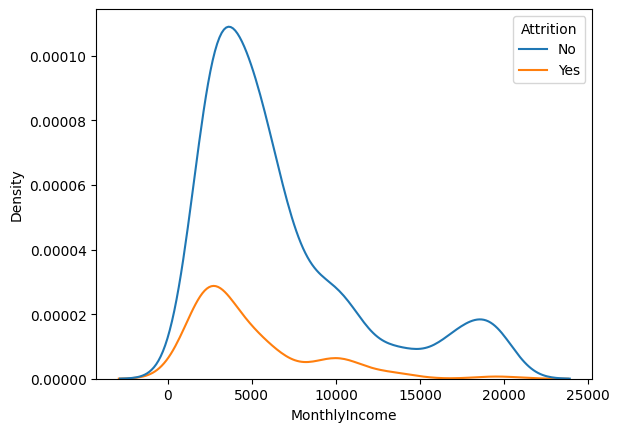

In [58]:
sns.kdeplot(data=temp_df[temp_df['Gender'] == 'Male'], x = 'MonthlyIncome', hue='Attrition')

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

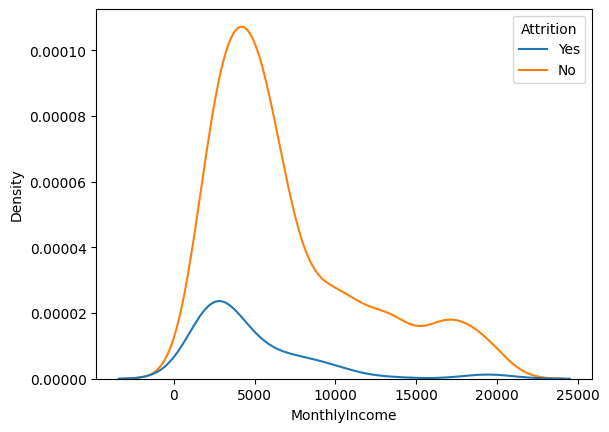

In [60]:
sns.kdeplot(data=temp_df[temp_df['Gender'] == 'Female'], x = 'MonthlyIncome', hue='Attrition')

From the above two graphs, we confirm our conclusion that as salary increases, the probality of employee leaving the company decreases for both male and female employees.

Let's look at the personal lives of the employees to gain insights about job satisfaction and attrition.

In [64]:
pd.crosstab(df['Attrition'], df['JobSatisfaction'], normalize = 'columns')*100

JobSatisfaction,1,2,3,4
Attrition,,,,
No,77.16263,83.571429,83.484163,88.671024
Yes,22.83737,16.428571,16.515837,11.328976


In [65]:
pd.crosstab(df['Attrition'], df['WorkLifeBalance'], normalize = 'columns')*100

WorkLifeBalance,1,2,3,4
Attrition,,,,
No,68.75,83.139535,85.778275,82.352941
Yes,31.25,16.860465,14.221725,17.647059


In [66]:
pd.crosstab(df['Attrition'], df['RelationshipSatisfaction'], normalize = 'columns')*100

RelationshipSatisfaction,1,2,3,4
Attrition,,,,
No,79.347826,85.148515,84.53159,85.185185
Yes,20.652174,14.851485,15.46841,14.814815


In [67]:
pd.crosstab(df['Attrition'], df['JobInvolvement'], normalize = 'columns')*100

JobInvolvement,1,2,3,4
Attrition,,,,
No,66.26506,81.066667,85.599078,90.972222
Yes,33.73494,18.933333,14.400922,9.027778


From the above results we conculde that Job satisfaction, Work life balance, Relationship satisfaction and Job involvement are important factors leading to attrition. Based on Job Satisfaction and Job involvement we can say that employees are much more likely to stay if they are involved in their work and feel valued at work. Employee's personal life also impact their descision of staying or leaving. If the employee has good work life balance and are satisfied in their personal relationships, they are much more likely to stay. 

Let's try to find out how salary and hikes vary with the number of working years and years at company. We will also try to find out how these things impact Attrition.

In [84]:
temp_df = df[['MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears','YearsAtCompany', 'Attrition']]

Let's start by calculating the correlation among the numerical columns

In [100]:
temp_df.drop(['Attrition'], axis = 1).corr()

,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany
MonthlyIncome,1.000000,-0.027269,0.772893,0.514285
PercentSalaryHike,-0.027269,1.000000,-0.020608,-0.035991
TotalWorkingYears,0.772893,-0.020608,1.000000,0.628133
YearsAtCompany,0.514285,-0.035991,0.628133,1.000000


<Axes: xlabel='MonthlyIncome', ylabel='PercentSalaryHike'>

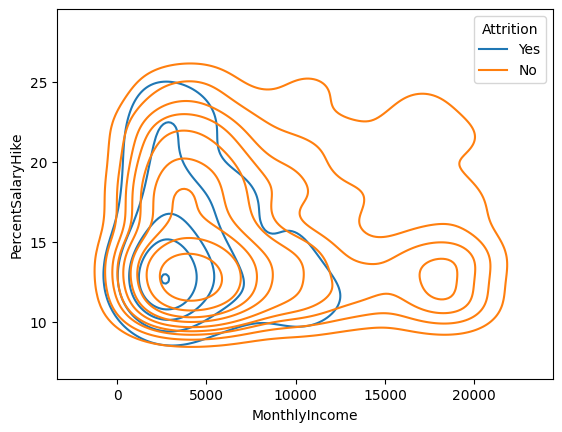

In [111]:
sns.kdeplot(data=temp_df, x='MonthlyIncome', y='PercentSalaryHike', hue='Attrition', levels=10)

We can see that even with high hikes, people are likely to leave if their salary is low. In reverse, people with high salaries are likely to stay even if they get low hikes.

<Axes: xlabel='MonthlyIncome', ylabel='TotalWorkingYears'>

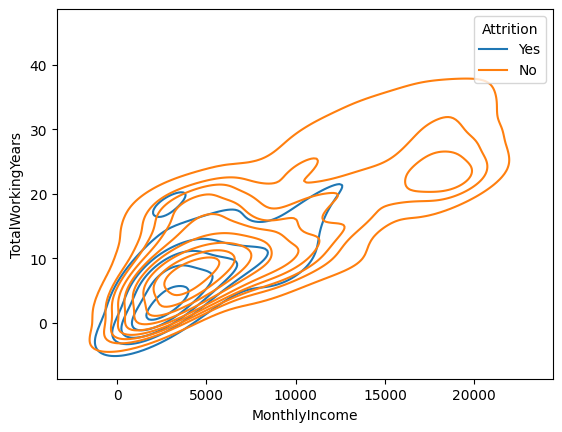

In [103]:
sns.kdeplot(data=temp_df, x='MonthlyIncome', y='TotalWorkingYears', hue='Attrition')

We see that a lot of people who leave are new into the field and have low salary. There is quite a linear relationship between MonthlyIncome and TotalWorkingYears, which is obvious as more experienced people are likely to be paid more. People tend to be more likely to stay as number of years and salary increases. We can see a few people leaving at the top of the graph which can be attributed to employees taking retirement afte a long time in the industry. We can also see that probability of leaving decreases considerably after the salary crosses Rs.10000.

<Axes: xlabel='PercentSalaryHike', ylabel='YearsAtCompany'>

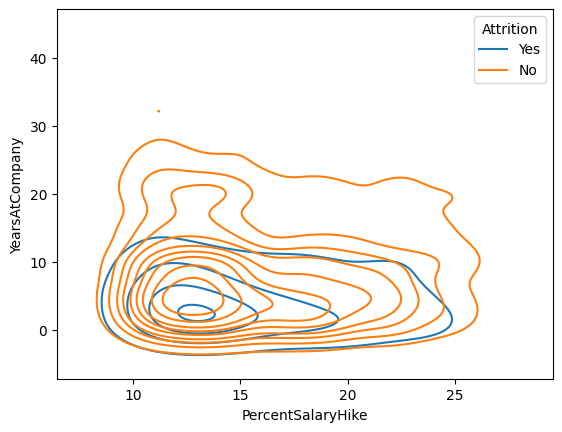

In [112]:
sns.kdeplot(data=temp_df, x='PercentSalaryHike', y='YearsAtCompany', hue='Attrition')

From this graph we see that there is no particular relation between percentage salary hike and years at company. The contours of both leaving and staying quite overlap. Also interesting to note that there are almost no hikes in salary after the age of 30.

Now we will try to further analyse job satisfaction and relate it to attriton

In [119]:
temp_df = df[['Education', 'EducationField', 'EnvironmentSatisfaction', 'JobRole', 'OverTime', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
              'YearsWithCurrManager', 'JobSatisfaction', 'Attrition']]

In [120]:
temp_df.head()

,Education,EducationField,EnvironmentSatisfaction,JobRole,OverTime,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobSatisfaction,Attrition
0,2,Life Sciences,2,Sales Executive,Yes,4,0,5,4,Yes
1,1,Life Sciences,3,Research Scientist,No,7,1,7,2,No
2,2,Other,4,Laboratory Technician,Yes,0,0,0,3,Yes
3,4,Life Sciences,4,Research Scientist,Yes,7,3,0,3,No
4,1,Medical,1,Laboratory Technician,No,2,2,2,2,No


In [124]:
pd.crosstab(df['JobRole'], df['EducationField'], margins=True)

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
JobRole,,,,,,,
Healthcare Representative,0,60,0,48,9,14,131
Human Resources,21,13,0,11,3,4,52
Laboratory Technician,0,119,0,99,22,19,259
Manager,6,40,14,32,5,5,102
Manufacturing Director,0,71,0,53,7,14,145
Research Director,0,36,0,35,4,5,80
Research Scientist,0,133,0,103,17,39,292
Sales Executive,0,107,122,65,13,19,326
Sales Representative,0,27,23,18,2,13,83


Age, DistanceFromHome, MonthlyIncome, Gender, Job Satisfaction, WorkLifeBalance, RelationshipSatisfaction, JobInvolvement, PercentSalaryHike, TotalWorkingYears,YearsAtCompany, Attrition

In [113]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [75]:
df.shape

(1470, 28)